# Data Reading + Cluster Processing

In [1]:
from wav_clustering_workflow import cluster_and_save_k
import pandas as pd
import glob

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import os
# set the parent directory for your samples.  this part of the path will not go into the name of the .wavs in the dendrogram visualization.
parent_dir = '/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/AudioMoth Room Data'

wavs = glob.glob(os.path.join(parent_dir, '*.WAV'))

output_dir = "/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/room_clusters"

In [3]:
cluster_and_save_k(wavs, 2, parent_dir=parent_dir, outdir=output_dir, k=10)

/usr/local/Caskroom/miniconda/base/envs/cs109a/lib/python3.12/site-packages/pyAudioAnalysis/audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io


/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/AudioMoth Room Data/20250526_202800.WAV duration = 5.0 seconds
50 frames, 68 features
/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/AudioMoth Room Data/20250527_215900.WAV duration = 5.0 seconds
50 frames, 68 features
/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/AudioMoth Room Data/20250527_050200.WAV duration = 5.0 seconds
50 frames, 68 features
/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/AudioMoth Room Data/20250526_143600.WAV duration = 5.0 seconds
50 frames, 68 features
/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/AudioMoth Room Data/20250527_054700.WAV duration = 5.0 seconds
50 frames, 68 features
/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/AudioMoth Room Data/20250527_150200.WAV duration = 5.0 seconds
50 frames, 68 features
/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/AudioMoth Room Data/20250527_154700.

# Analysis

In [6]:
import pickle
from scipy.cluster.hierarchy import fcluster
import pandas as pd

# Load the linkage and feature-matrix
Z = pickle.load(open('/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/room_clusters/ward_linkage.pkl','rb'))
df = pd.read_pickle('/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/room_clusters/df_matrix.pkl')

# Flatten into exactly 5 clusters
labels = fcluster(Z, t=10, criterion='maxclust')

# Group names by cluster
clusters = {}
for name, lbl in zip(df.columns, labels):
    if lbl not in clusters:
        clusters[lbl] = []
    clusters[lbl].append(name)

# Print up to 5 names per cluster
for i in sorted(clusters.keys()):
    print(f"Cluster {i} ({len(clusters[i])} items):")
    for fn in clusters[i][:5]:      # show only first 5
        print("  ", fn)
    if len(clusters[i]) > 5:
        print("   …")

Cluster 1 (165 items):
   20250527_083500.WAV
   20250526_110700.WAV
   20250526_220900.WAV
   20250527_111300.WAV
   20250527_195000.WAV
   …
Cluster 2 (23 items):
   20250527_181100.WAV
   20250527_162500.WAV
   20250526_194600.WAV
   20250527_195400.WAV
   20250526_165600.WAV
   …
Cluster 3 (72 items):
   20250523_112700.WAV
   20250527_204400.WAV
   20250527_072300.WAV
   20250527_191500.WAV
   20250526_192500.WAV
   …
Cluster 4 (165 items):
   20250527_154700.WAV
   20250526_185900.WAV
   20250527_060300.WAV
   20250527_172300.WAV
   20250526_161700.WAV
   …
Cluster 5 (10 items):
   20250526_190700.WAV
   20250527_123200.WAV
   20250526_190500.WAV
   20250526_191900.WAV
   20250527_123300.WAV
   …
Cluster 6 (140 items):
   20250527_150200.WAV
   20250527_064600.WAV
   20250526_155300.WAV
   20250527_212100.WAV
   20250526_191800.WAV
   …
Cluster 7 (871 items):
   20250526_202800.WAV
   20250527_092800.WAV
   20250527_003300.WAV
   20250526_223400.WAV
   20250527_200100.WAV
   …
Cl

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


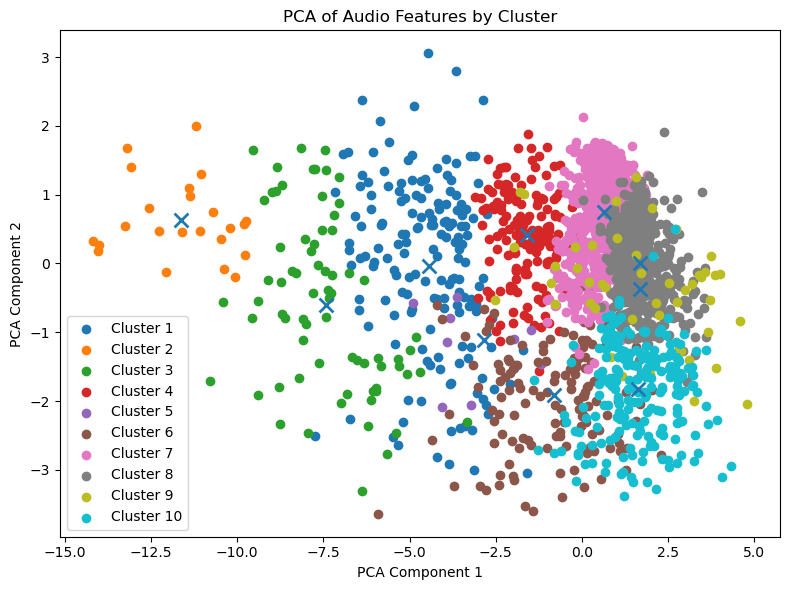

In [7]:
import pickle
import pandas as pd
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import ward
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 3. Prepare data for PCA: samples×features
X = df.T.values

# 4. Run PCA down to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 5. Plot each cluster in the PCA space
plt.figure(figsize=(8, 6))
for cluster_id in sorted(set(labels)):
    idx = (labels == cluster_id)
    plt.scatter(
        X_pca[idx, 0], 
        X_pca[idx, 1], 
        label=f'Cluster {cluster_id}'
    )

# 6. Overlay cluster centroids
centroids = []
for cluster_id in sorted(set(labels)):
    idx = (labels == cluster_id)
    centroids.append(X_pca[idx].mean(axis=0))
centroids = pd.DataFrame(centroids, index=[f'Cluster {i}' for i in sorted(set(labels))])
plt.scatter(centroids[0], centroids[1], marker='x', s=100, linewidths=2)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Audio Features by Cluster')
plt.legend()
plt.tight_layout()
plt.show()

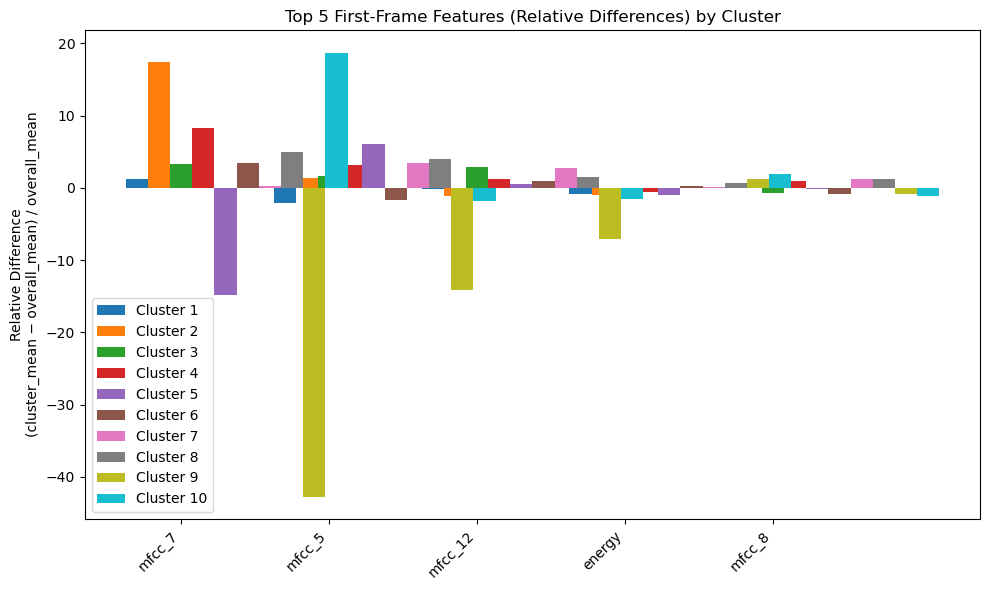

In [8]:
import numpy as np
# 3. Pull out first-frame (rows 0–67)
first_frame = df.iloc[:68, :]

# 4. Compute per-cluster means
cluster_means = pd.DataFrame({
    cl: first_frame.loc[:, np.array(first_frame.columns)[labels == cl]].mean(axis=1)
    for cl in sorted(set(labels))
})

# 5. Normalize to relative differences
overall_mean = cluster_means.mean(axis=1)
rel_diff = (cluster_means.sub(overall_mean, axis=0)
                        .div(overall_mean, axis=0))

# 6. Pick top 5 features by variance
top_idx = rel_diff.var(axis=1).nlargest(5).index

# 7. Map row‐index → feature name
feature_list = [
    'zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread',
    'spectral_entropy', 'spectral_flux', 'spectral_rolloff',
    'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
    'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
    'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6',
    'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12',
    'chroma_std', 'delta_zcr', 'delta_energy', 'delta_energy_entropy',
    'delta_spectral_centroid', 'delta_spectral_spread', 'delta_spectral_entropy',
    'delta_spectral_flux', 'delta_spectral_rolloff', 'delta_mfcc_1',
    'delta_mfcc_2', 'delta_mfcc_3', 'delta_mfcc_4', 'delta_mfcc_5',
    'delta_mfcc_6', 'delta_mfcc_7', 'delta_mfcc_8', 'delta_mfcc_9',
    'delta_mfcc_10', 'delta_mfcc_11', 'delta_mfcc_12', 'delta_mfcc_13',
    'delta_chroma_1', 'delta_chroma_2', 'delta_chroma_3', 'delta_chroma_4',
    'delta_chroma_5', 'delta_chroma_6', 'delta_chroma_7', 'delta_chroma_8',
    'delta_chroma_9', 'delta_chroma_10', 'delta_chroma_11',
    'delta_chroma_12', 'delta_chroma_std'
]

# 8. Plot
x = np.arange(len(top_idx))
width = 0.15
plt.figure(figsize=(10, 6))

for i, cl in enumerate(sorted(rel_diff.columns)):
    plt.bar(x + i*width,
            rel_diff.loc[top_idx, cl],
            width=width,
            label=f'Cluster {cl}')

# replace the numeric ticks with the real feature names
plt.xticks(x + width*2, [feature_list[i] for i in top_idx], rotation=45, ha='right')

plt.ylabel('Relative Difference\n(cluster_mean − overall_mean) / overall_mean')
plt.title('Top 5 First-Frame Features (Relative Differences) by Cluster')
plt.legend()
plt.tight_layout()
plt.show()

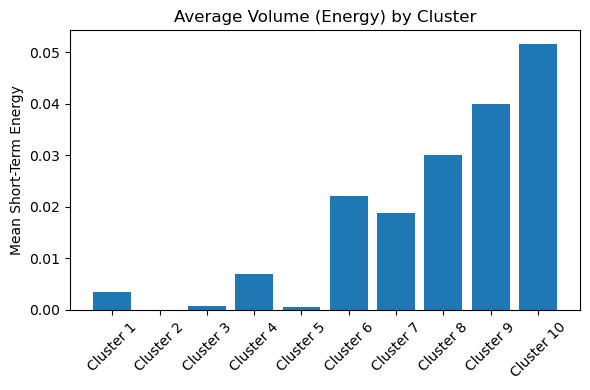

In [10]:
# 3) Extract the “energy” row from the first frame
#    In the 68‐feature ordering, energy is row index 1
energy = df.iloc[1, :]          # a 1×n_samples Series

# 4) Group by cluster, compute mean energy
cluster_ids = sorted(np.unique(labels))
means = [energy.values[labels == cl].mean() for cl in cluster_ids]

# 5) Plot
plt.figure(figsize=(6,4))
plt.bar([f'Cluster {cl}' for cl in cluster_ids], means)
plt.ylabel('Mean Short-Term Energy')
plt.title('Average Volume (Energy) by Cluster')
plt.xticks(rotation=45)  # Make labels slanted
plt.tight_layout()
plt.show()

# Timeseries Analysis

In [14]:
# go through each cluster folder, and convert file name into datetime
cluster_dir = '/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/room_clusters'
import os
import pandas as pd

# Initialize an empty list to store datetime, cluster, and filename information
datetime_cluster_filename_list = []

# Iterate through each cluster directory
for cluster in os.listdir(cluster_dir):
    # Construct the full path to the cluster directory
    cluster_path = os.path.join(cluster_dir, cluster)
    # Check if the cluster path is a directory
    if os.path.isdir(cluster_path):
        print(os.listdir(cluster_path))
        # Iterate through each file in the cluster directory
        for file in os.listdir(cluster_path):
            # Check if the file is a .wav file
            if file.endswith('.WAV'):
                # Extract the datetime from the file name
                date = file.split('_')[1]
                time = file.split('_')[2]
                # Convert the datetime string to a datetime object
                datetime = pd.to_datetime(date + ' ' + time)
                # Append the datetime, cluster, and filename information to the list
                datetime_cluster_filename_list.append((datetime, cluster, file))

# Convert the list into a DataFrame
df_datetime_cluster = pd.DataFrame(datetime_cluster_filename_list, columns=['datetime', 'cluster', 'file'])
        



['00014_20250527_221000.WAV', '00018_20250527_203600.WAV', '00009_20250526_191300.WAV', '00016_20250527_194600.WAV', '00015_20250527_080700.WAV', '00010_20250526_190800.WAV', 'original_filenames.txt', '00011_20250526_191500.WAV', '00019_20250527_080600.WAV', '00012_20250527_202800.WAV', '00013_20250527_194400.WAV', '00017_20250527_211600.WAV', '00021_20250527_202900.WAV', '00007_20250526_165700.WAV', '00020_20250527_102400.WAV', '00022_20250526_192900.WAV', '00005_20250526_164800.WAV', '00006_20250527_192900.WAV', '00004_20250526_165600.WAV', '00001_20250527_162500.WAV', '00002_20250526_194600.WAV', '00000_20250527_181100.WAV', '00003_20250527_195400.WAV', '00008_20250526_192200.WAV']
['original_filenames.txt', '00007_20250527_221500.WAV', '00008_20250526_195500.WAV', '00009_20250527_140800.WAV', '00006_20250526_164200.WAV', '00005_20250527_121500.WAV', '00003_20250526_191900.WAV', '00004_20250527_123300.WAV', '00001_20250527_123200.WAV', '00000_20250526_190700.WAV', '00002_20250526_19

/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_75599/2547985079.py:24: FutureWarning: Parsed string "20250527 221000.WAV" included an un-recognized timezone "WAV". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  datetime = pd.to_datetime(date + ' ' + time)
/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_75599/2547985079.py:24: FutureWarning: Parsed string "20250527 203600.WAV" included an un-recognized timezone "WAV". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  datetime = pd.to_datetime(date + ' ' + time)
/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_75599/2547985079.py:24: FutureWarning: Parsed string "20250526 191300.WAV" included an un-recognized timezone "WAV". 

['00068_20250526_184700.WAV', '00032_20250526_194000.WAV', '00033_20250527_150600.WAV', '00028_20250527_052200.WAV', '00139_20250527_075700.WAV', '00123_20250526_202600.WAV', '00029_20250527_062300.WAV', '00138_20250527_192400.WAV', '00031_20250526_213100.WAV', '00030_20250526_175200.WAV', '00122_20250527_172900.WAV', '00124_20250526_152500.WAV', 'original_filenames.txt', '00125_20250527_045400.WAV', '00039_20250526_194700.WAV', '00126_20250527_141100.WAV', '00120_20250527_142800.WAV', '00038_20250527_075800.WAV', '00034_20250527_203800.WAV', '00127_20250527_134400.WAV', '00121_20250526_193600.WAV', '00022_20250526_122400.WAV', '00062_20250527_141800.WAV', '00131_20250527_194500.WAV', '00063_20250526_155400.WAV', '00023_20250526_215200.WAV', '00035_20250527_074100.WAV', '00037_20250526_124000.WAV', '00060_20250526_194300.WAV', '00129_20250526_115500.WAV', '00133_20250527_173600.WAV', '00130_20250527_073400.WAV', '00036_20250526_141100.WAV', '00128_20250526_195300.WAV', '00132_20250527_

/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_75599/2547985079.py:24: FutureWarning: Parsed string "20250526 133100.WAV" included an un-recognized timezone "WAV". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  datetime = pd.to_datetime(date + ' ' + time)
/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_75599/2547985079.py:24: FutureWarning: Parsed string "20250527 013000.WAV" included an un-recognized timezone "WAV". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  datetime = pd.to_datetime(date + ' ' + time)
/var/folders/sj/t2ndtfhd5ws8gdsr_2fvxpsc0000gn/T/ipykernel_75599/2547985079.py:24: FutureWarning: Parsed string "20250527 054900.WAV" included an un-recognized timezone "WAV". 

['00020_20250527_055900.WAV', '00021_20250527_220300.WAV', 'original_filenames.txt', '00042_20250527_163400.WAV', '00040_20250527_071600.WAV', '00046_20250527_175700.WAV', '00045_20250527_071200.WAV', '00044_20250527_220800.WAV', '00041_20250527_141500.WAV', '00043_20250526_212000.WAV', '00033_20250527_071300.WAV', '00032_20250526_212100.WAV', '00019_20250527_171900.WAV', '00037_20250527_070800.WAV', '00036_20250527_201700.WAV', '00034_20250527_071100.WAV', '00018_20250527_211900.WAV', '00028_20250527_084400.WAV', '00011_20250527_212500.WAV', '00038_20250527_163600.WAV', '00030_20250527_214900.WAV', '00009_20250527_140200.WAV', '00029_20250527_212800.WAV', '00008_20250527_220000.WAV', '00035_20250527_171100.WAV', '00039_20250527_203400.WAV', '00010_20250527_211800.WAV', '00031_20250527_181800.WAV', '00003_20250527_162700.WAV', '00007_20250527_181700.WAV', '00013_20250527_212000.WAV', '00002_20250527_220400.WAV', '00006_20250526_194200.WAV', '00000_20250527_215900.WAV', '00005_20250527_

In [15]:
df_datetime_cluster

,datetime,cluster,file
0,2025-05-27 22:10:00,cluster_02,00014_20250527_221000.WAV
1,2025-05-27 20:36:00,cluster_02,00018_20250527_203600.WAV
2,2025-05-26 19:13:00,cluster_02,00009_20250526_191300.WAV
3,2025-05-27 19:46:00,cluster_02,00016_20250527_194600.WAV
4,2025-05-27 08:07:00,cluster_02,00015_20250527_080700.WAV
...,...,...,...
2266,2025-05-27 20:46:00,cluster_09,00004_20250527_204600.WAV
2267,2025-05-23 12:09:00,cluster_09,00023_20250523_120900.WAV
2268,2025-05-27 21:33:00,cluster_09,00022_20250527_213300.WAV
2269,2025-05-27 22:05:00,cluster_09,00015_20250527_220500.WAV


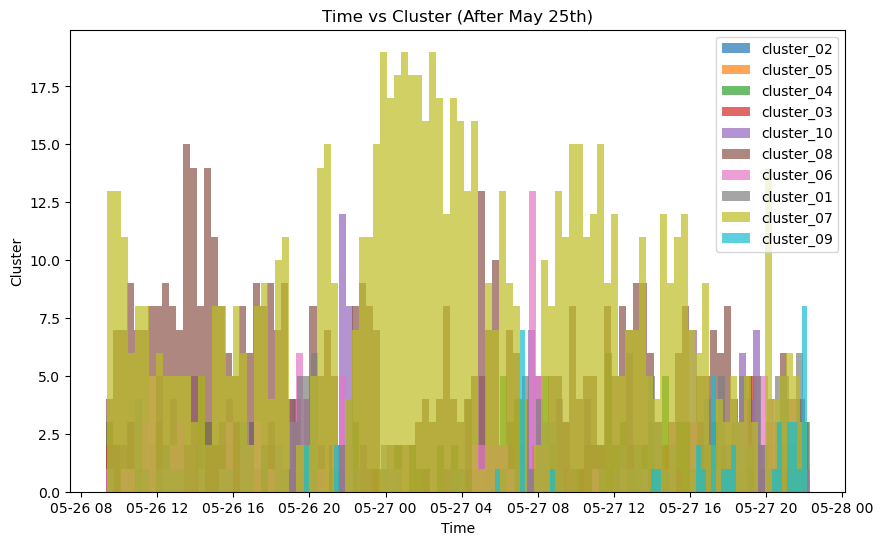

In [17]:
# make a histogram against time for each cluster, excluding anything before the 25th of May
plt.figure(figsize=(10, 6))
for cluster in df_datetime_cluster['cluster'].unique():
    filtered_df = df_datetime_cluster[(df_datetime_cluster['cluster'] == cluster) & (df_datetime_cluster['datetime'] >= '2025-05-25')]
    plt.hist(filtered_df['datetime'], bins=100, alpha=0.7, label=cluster)
plt.xlabel('Time')
plt.ylabel('Cluster')
plt.title('Time vs Cluster (After May 25th)')
plt.legend()
plt.show()

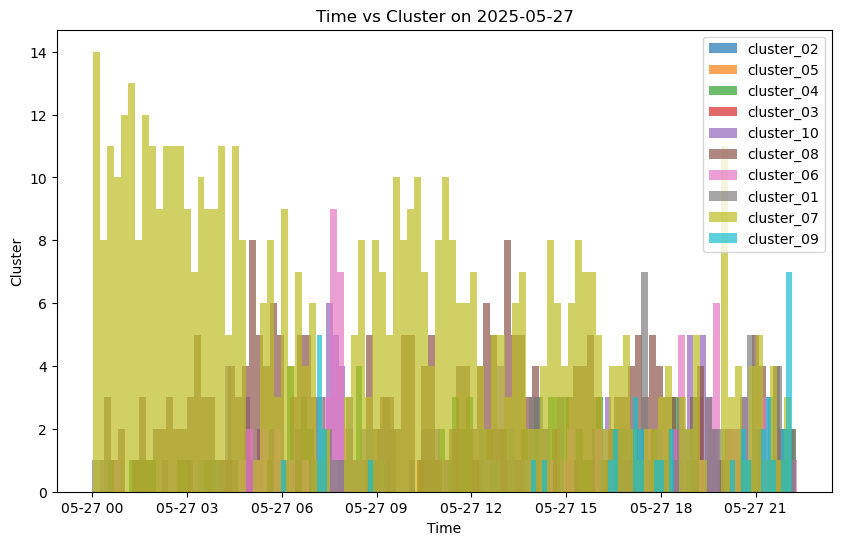

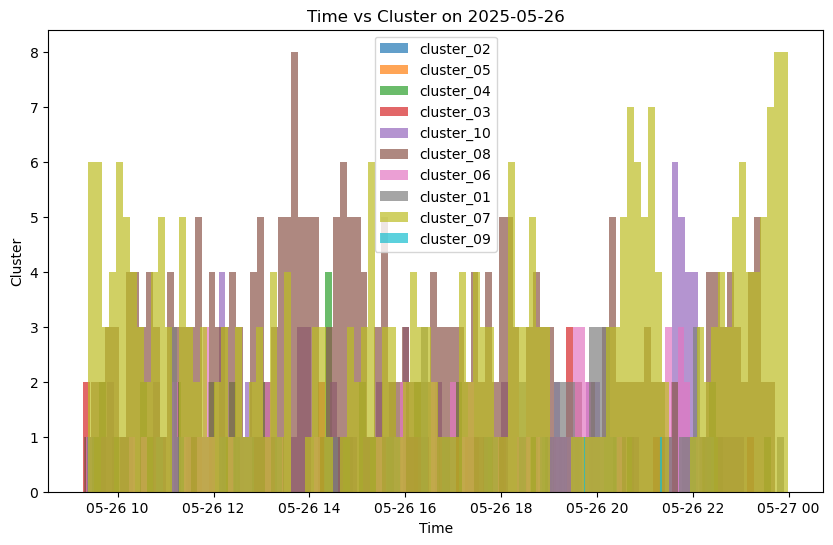

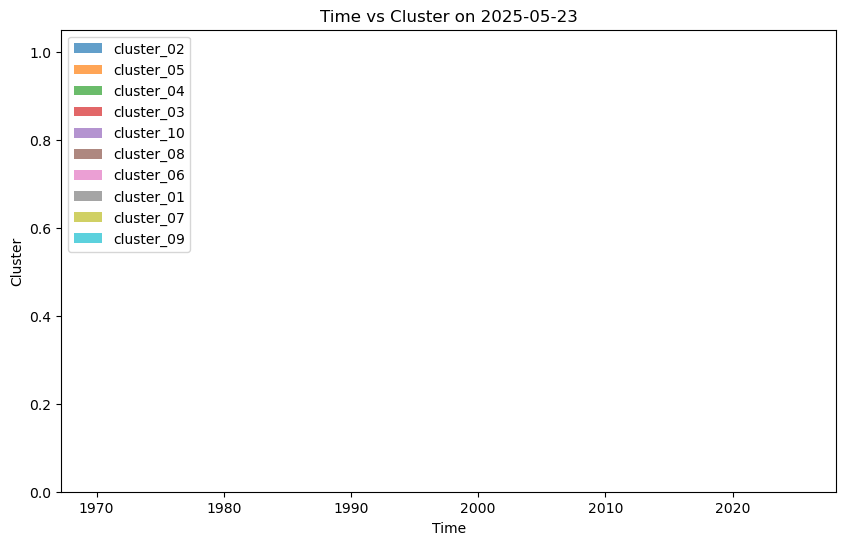

In [18]:
# make a histogram against time for each cluster, excluding anything before the 25th of May
for day in df_datetime_cluster['datetime'].dt.date.unique():
    plt.figure(figsize=(10, 6))
    for cluster in df_datetime_cluster['cluster'].unique():
        filtered_df = df_datetime_cluster[(df_datetime_cluster['cluster'] == cluster) & (df_datetime_cluster['datetime'].dt.date == day)]
        plt.hist(filtered_df['datetime'], bins=100, alpha=0.7, label=cluster)
    plt.xlabel('Time')
    plt.ylabel('Cluster')
    plt.title(f'Time vs Cluster on {day}')
    plt.legend()
    plt.show()

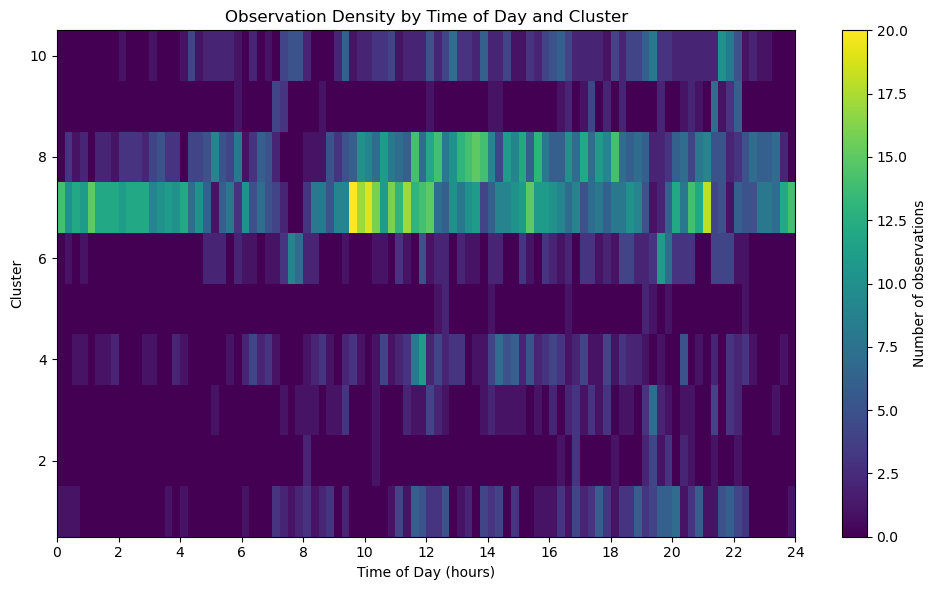

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣  Flatten the time-of-day to a single float in hours
time_of_day = (
    df_datetime_cluster['datetime'].dt.hour
    + df_datetime_cluster['datetime'].dt.minute / 60
    + df_datetime_cluster['datetime'].dt.second / 3600
)
clusters = df_datetime_cluster['cluster'].apply(lambda x: x.split('_')[1]).astype(float)  # Convert cluster to float to avoid TypeError

# 2️⃣  Build bin edges
#    • X: 96 bins = 15-minute resolution across 24 h
#    • Y: one bin per integer cluster label
x_bins = np.linspace(0, 24, 97)                                  # 0-24 h, inclusive
y_bins = np.arange(clusters.min() - 0.5, clusters.max() + 1.5)    # center on integers

# 3️⃣  Plot the 2-D histogram
fig, ax = plt.subplots(figsize=(10, 6))
counts, _, _, im = ax.hist2d(
    time_of_day,
    clusters,
    bins=[x_bins, y_bins],
    cmap='viridis',         # optional; remove if you truly want the default palette
)

# 4️⃣  Tidy up
ax.set_xlabel('Time of Day (hours)')
ax.set_ylabel('Cluster')
ax.set_title('Observation Density by Time of Day and Cluster')
ax.set_xlim(0, 24)
ax.set_xticks(np.arange(0, 25, 2))        # every 2 h for readability
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Number of observations')

plt.tight_layout()
plt.show()


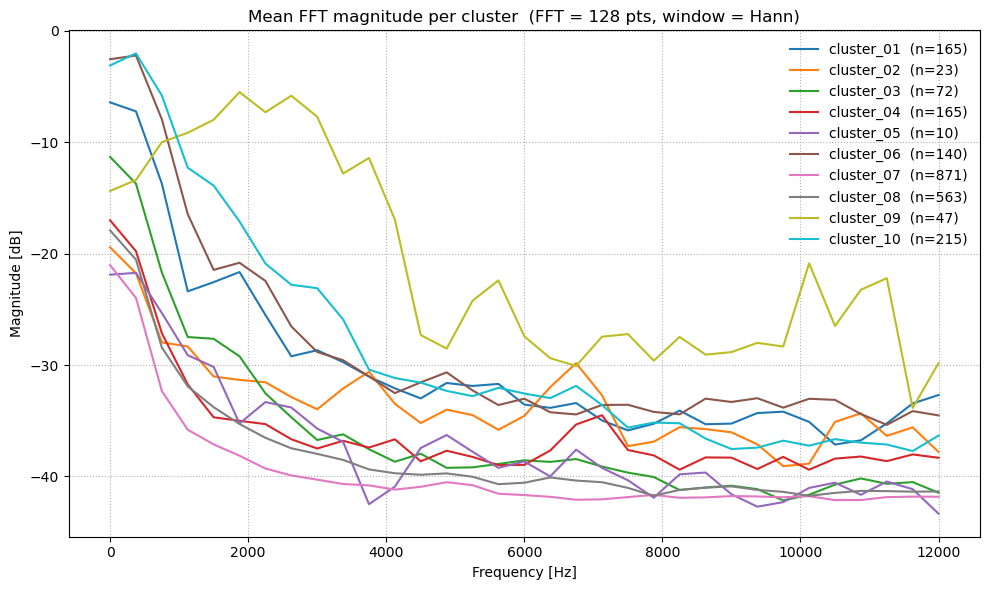

In [21]:
from pathlib import Path
from collections import defaultdict
import numpy as np
import scipy.signal as sps
import soundfile as sf
import matplotlib.pyplot as plt
from tqdm import tqdm

# ── configuration ───────────────────────────────────────────────────────────
AUDIO_ROOT = Path("/Users/alexoort/Documents/Oxford/Audio Disaggregation/AudioMoth/room_clusters")
TARGET_FS  = 48_000                # AudioMoth default
FFT_LEN    = 128             # 2.73 s @ 48 kHz; any power-of-two is fine
FMAX_PLOT  = 12_000                # crop upper x-axis
WINDOW     = sps.windows.hann      # choose your favourite taper
CMAP       = plt.get_cmap("tab10")

# ── helper: read file, resample if needed, make mono ────────────────────────
def load_mono(path, target_fs):
    x, fs = sf.read(path, always_2d=False)
    if x.ndim == 2:                   # stereo → mono
        x = x.mean(axis=1)
    if fs != target_fs:               # keep common grid
        x = sps.resample_poly(x, target_fs, fs)
    return x.astype(np.float32, copy=False)

# ── main loop: build per-cluster list of FFT magnitudes ─────────────────────
cluster_mag = defaultdict(list)
cluster_cnt = defaultdict(int)

for cluster_dir in sorted(AUDIO_ROOT.iterdir()):
    if not cluster_dir.is_dir():
        continue
    for wav in tqdm(cluster_dir.glob("*.WAV"), desc=cluster_dir.name, leave=False):
        x = load_mono(wav, TARGET_FS)

        # ——— keep exactly FFT_LEN samples (pad or truncate) ———
        if len(x) < FFT_LEN:
            x = np.pad(x, (0, FFT_LEN - len(x)))
        else:
            x = x[:FFT_LEN]

        # ——— FFT ———
        w    = WINDOW(FFT_LEN, sym=False)
        Xmag = np.abs(np.fft.rfft(x * w))        # half-spectrum, linear magnitude

        cluster_mag[cluster_dir.name].append(Xmag)
        cluster_cnt[cluster_dir.name] += 1

# ── average magnitudes per cluster ─────────────────────────────────────────
freqs = np.fft.rfftfreq(FFT_LEN, 1 / TARGET_FS)
mean_mag = {c: np.mean(np.vstack(mags), axis=0) for c, mags in cluster_mag.items()}

# ── plot ───────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 6))
for i, (c, mag) in enumerate(sorted(mean_mag.items())):
    sel = freqs <= FMAX_PLOT
    plt.plot(freqs[sel],
             20 * np.log10(mag[sel] + 1e-12),          # dB magnitude
             label=f"{c}  (n={cluster_cnt[c]})",
             color=CMAP(i % CMAP.N))

plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.title(f"Mean FFT magnitude per cluster  (FFT = {FFT_LEN} pts, window = Hann)")
plt.legend(frameon=False)
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()
